<a href="https://colab.research.google.com/github/Eaag2001/IA-Sistemas2024/blob/main/PerceptronIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron
Implementación del algoritmo donde aprende dos clases (Setosa, Versicolor).

## Librerias


*   **NumPy** para operaciones con matrices y álgebra lineal.
*   **Pandas** para manipulación de datos (Para este casi se usa para cargar y procesar el conjunto de datos Iris).
*   **Matplotlib** visualización de datos.

Este constructor iniciliza a perceptron con tres parametros:
* **eta:** tasa de aprendizaje, que controla cuando se ajustan los pesos en cada paso.
* **n_iter:** numero de iteraciones o epocas.
* **random_state:** garantiza reproducibilidad, inicializa los pesos de manera aleatoria.

In [ ]:
from IPython.display import Image

import numpy as np

class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

**Metodo FIT:** ajusta los datos de entrenamiento.La variable X es la matriz de caracteristicas con Y son sus etiquetas correspondientes.

**self.w_:** se inicializan los pesos aleatoriamente. En el vector w_ se incluye un peso adicional para el sesgo en la posicion w_ [0].

**update, self.w_[1:], self.w_[0]:** evalua si la prediccion no coincide con el valor real, se ajusta los pesos de forma proporciona entre la prediccion y el valor del objeto [xi]multiplocado por la taza de aprendizaje, y los errores se almacenan en la lista errors_ para cada epoca.

In [ ]:
  def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []

      for _ in range(self.n_iter):
        errors = 0
        for xi, target in zip(X, y):
          update = self.eta * (target - self.predict(xi))
          self.w_[1:] += update * xi
          self.w_[0] += update
          errors += int(update != 0.0)
        self.errors_.append(errors)
      return self

**METODOS AUXILIARES**
* **net_input:** Calcula la suma ponderada de las entradas y los pesos.
* **predict:** Devuelve la prediccion de la clase (-1 o 1) aplocando una funcion de activacion.

In [ ]:
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

Calcula el angulo en radianes entre dos vectores v1 y v2 usando el coseno del angulo.
df: carga el conjunto de datos Iris que contiene 150 ejemplos de tres especies de iris (setosa, versicolor, virginica), para este ejemplo solo se toman 100 (50 setosa y 50 versicolor).

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


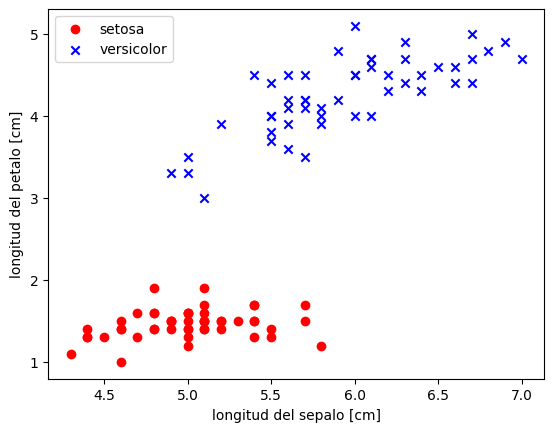

In [ ]:
import matplotlib.pyplot as plt

#import numpy as np
#seleccionar setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#extraer longitud de sepalo y longitud de petalo
X = df.iloc[0:100, [0, 2]].values

#representar los datos de forma de grafico
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('longitud del sepalo [cm]')
plt.ylabel('longitud del petalo [cm]')
plt.legend(loc='upper left')

plt.show()

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Errores de clasificacion')

plt.show()

TypeError: Perceptron.__init__() got an unexpected keyword argument 'eta'